In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [10]:
# only a couple thousand data points, do not need AWS
train_har = pd.read_csv('train_har.csv', index_col=0, parse_dates=True)
test_har = pd.read_csv('test_har.csv', index_col=0, parse_dates=True)

print(train_har.index)
print(test_har)

DatetimeIndex(['2014-01-24', '2014-01-27', '2014-01-28', '2014-01-29',
               '2014-01-30', '2014-01-31', '2014-02-03', '2014-02-04',
               '2014-02-05', '2014-02-06',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1243, freq=None)
               CLOSE     DAILY    WEEKLY   MONTHLY
DATE                                              
2019-01-02  3.145014  3.235536  3.307892  3.245397
2019-01-03  3.236716  3.145014  3.272281  3.252709
2019-01-04  3.062456  3.236716  3.204799  3.251608
2019-01-07  3.063391  3.062456  3.148623  3.251433
2019-01-08  3.018960  3.063391  3.105307  3.250886
...              ...       ...       ...       ...
2019-12-24  2.539237  2.534490  2.531618  2.613098
2019-12-26  2.537657  2.539237  2.532728  2.598571
2019-12-27  2.597491  2.5

In [11]:
har = LinearRegression().fit(train_har[["DAILY", "WEEKLY","MONTHLY"]],train_har['CLOSE'])

In [28]:
print(har.intercept_)
print(har.coef_)

0.09469101901044485
[ 0.56454081  0.4786391  -0.07850583]


In [23]:
test_har['PRED'] = har.predict(test_har[["DAILY", "WEEKLY","MONTHLY"]])

In [26]:
print(test_har)
rmse = mean_squared_error(test_har['CLOSE'], test_har['PRED'], squared=False)
print(rmse)

               CLOSE     DAILY    WEEKLY   MONTHLY      PRED
DATE                                                        
2019-01-02  3.145014  3.235536  3.307892  3.245397  3.249787
2019-01-03  3.236716  3.145014  3.272281  3.252709  3.181065
2019-01-04  3.062456  3.236716  3.204799  3.251608  3.200621
2019-01-07  3.063391  3.062456  3.148623  3.251433  3.075370
2019-01-08  3.018960  3.063391  3.105307  3.250886  3.055208
...              ...       ...       ...       ...       ...
2019-12-24  2.539237  2.534490  2.531618  2.613098  2.532102
2019-12-26  2.537657  2.539237  2.532728  2.598571  2.536454
2019-12-27  2.597491  2.537657  2.547081  2.592500  2.542908
2019-12-30  2.695978  2.597491  2.580971  2.593779  2.592807
2019-12-31  2.623218  2.695978  2.598716  2.594508  2.656844

[252 rows x 5 columns]
0.06766980059007138


<AxesSubplot:xlabel='DATE'>

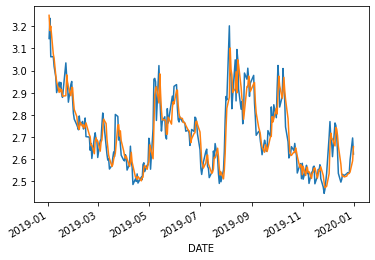

In [25]:
test_har['CLOSE'].plot()
test_har['PRED'].plot()